In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def kalman_filter(data):
    n = len(data)
    xhat = np.zeros(n)       # 滤波后的状态估计
    P = np.zeros(n)          # 滤波后的状态协方差矩阵
    xhatminus = np.zeros(n)  # 预测状态估计
    Pminus = np.zeros(n)     # 预测状态协方差矩阵
    K = np.zeros(n)          # 卡尔曼增益
    Q = 1e-5                 # 状态转移协方差矩阵
    R = 0.1                  # 观测噪声协方差矩阵

    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n):
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat


In [17]:

data = pd.DataFrame(np.random.randn(100), columns=['value'])
print("Source Data:", data)
filtered_data = kalman_filter(data['value'].values)
print("Filtered Data:", filtered_data)


Source Data:        value
0   1.919897
1  -1.767158
2   0.405565
3   0.796836
4   0.149838
..       ...
95 -1.915784
96  0.726882
97 -0.623493
98  0.360952
99 -0.041208

[100 rows x 1 columns]
Filtered Data: [ 1.91989689e+00 -1.43197407e+00 -5.56904577e-01 -1.20134877e-01
 -5.42634757e-02  1.46059830e-01  3.28383937e-01  4.49983130e-01
  5.16871035e-01  3.65218661e-01  3.09401330e-01  1.08970385e-01
  1.68591519e-01  2.27607872e-01  2.09550252e-01  1.89483549e-01
  1.73544987e-01  1.52198018e-01  9.65541277e-02  6.78246082e-02
  9.64406893e-02 -2.49287033e-02  6.12970387e-02  4.21163456e-02
  3.11671476e-02  2.87102062e-02  8.08538708e-02  4.24764455e-02
 -2.19320674e-03 -1.52783721e-02 -3.80123675e-02  7.01881918e-03
  2.93407830e-02  4.36100061e-02  2.71537998e-02  6.20436733e-04
 -3.67921432e-03  7.62233784e-03 -2.55563101e-02  1.64791091e-02
  3.66148790e-02  6.70663371e-02  1.10376221e-01  1.09460954e-01
  1.20202993e-01  1.56270352e-01  1.60981233e-01  1.58748133e-01
  2.19270512

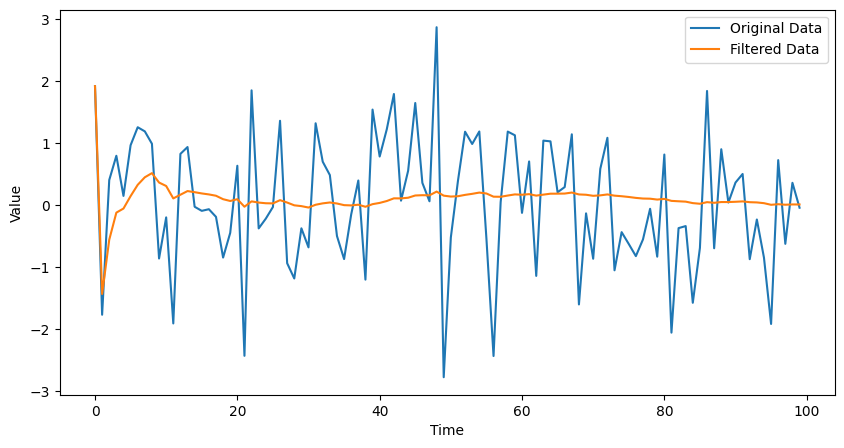

In [18]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data['value'], label='Original Data')
ax.plot(data.index, filtered_data, label='Filtered Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()